# Porównanie odsetek kredytowych

### Zadanie: kupujemy mieszkanie
Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

Do wykonania powyższego zadania wykorzystaj biblioteki NumPy, NumPy-financial oraz Matplotlib. Odpowiedzi na pytania umieść w Notebooku (jeśli korzystasz) lub w komentarzach w kodzie.

In [13]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

#### 1. Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?

In [14]:
freq = 12
rate = 0.05 # stopa oprocentowania rocznego
nper = 5 # liczba wszystkich okresów
pv = 120000 # poczatkowa cena mieszkania
per = np.arange(1,nper+1, dtype=int) # wektor licznika każdej kolejnej płatności
p2 = nper*freq

In [15]:
#wartość przyszła mieszkania przy npf.fv(stopie 'rate'), 
# (kapitalizacji co 'nper'), (bez dodtakowej kwoty rocznie), 
# (początkowa cena mieszkania 'pv')

In [16]:
future_price = np.around(npf.fv(rate, nper, 0, -pv),2) 
# Zgodnie z konwencją znak minus oznacza wypływ gotówki 
# (tj. pieniądze niedostępne dzisiaj). 
future_price_np = np.around(npf.fv(rate, per, 0, -pv),2)
future_price_np

array([126000.  , 132300.  , 138915.  , 145860.75, 153153.79])

In [17]:
print(f'Orientacyjna cena mieszkania za 5 lat wyniesie: {future_price} zł.')

Orientacyjna cena mieszkania za 5 lat wyniesie: 153153.79 zł.


In [18]:
fp = np.sort(((np.zeros((12,1)) + future_price_np).reshape(1,60)).flatten())
# fp.flatten()
# fp.sort()
fp

array([126000.  , 126000.  , 126000.  , 126000.  , 126000.  , 126000.  ,
       126000.  , 126000.  , 126000.  , 126000.  , 126000.  , 126000.  ,
       132300.  , 132300.  , 132300.  , 132300.  , 132300.  , 132300.  ,
       132300.  , 132300.  , 132300.  , 132300.  , 132300.  , 132300.  ,
       138915.  , 138915.  , 138915.  , 138915.  , 138915.  , 138915.  ,
       138915.  , 138915.  , 138915.  , 138915.  , 138915.  , 138915.  ,
       145860.75, 145860.75, 145860.75, 145860.75, 145860.75, 145860.75,
       145860.75, 145860.75, 145860.75, 145860.75, 145860.75, 145860.75,
       153153.79, 153153.79, 153153.79, 153153.79, 153153.79, 153153.79,
       153153.79, 153153.79, 153153.79, 153153.79, 153153.79, 153153.79])

#### 2. Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?

In [19]:
# płatność stała do banku co miesiąc 'pmt' = ????? 

In [20]:
freq = 12 #kapitalizacja odsetek 12 razy w roku
rate = 0.12 # roczna stopa oprocentowania
years = 5 # liczba lat oszczędzania
pv = 0 # teraźniejsza wartość w banku
fv = future_price # kwota jaką chemy uzyskać równa cenie mieszkania za 5 lat

rf = rate/freq # konwersja stopy do okresu miesięcznego
nper = years * freq # liczba wszystkich okresów kapitalizacji
per = np.arange(1,nper+1, dtype=int) # wektor licznika każdej kolejnej płatności

In [21]:
wplata = np.around(npf.pmt(rf, nper, -pv, -fv, when='end'),2)
# Zgodnie z konwencją znak minus oznacza wypływ gotówki 
# (tj. pieniądze niedostępne dzisiaj). 
wplata

1875.28

In [22]:
print(f'Muszę wpłacać {wplata} złotych do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat.')

Muszę wpłacać 1875.28 złotych do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat.


#### 3. Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.

In [23]:
# wartość przyszła przy wyliczonej 'wpłacie'
fv_save = np.around(npf.fv(rf, per, -wplata, -pv, when='end'),2)
fv_save

array([  1875.28,   3769.31,   5682.29,   7614.39,   9565.81,  11536.75,
        13527.4 ,  15537.95,  17568.61,  19619.58,  21691.05,  23783.24,
        25896.36,  28030.6 ,  30186.19,  32363.33,  34562.24,  36783.14,
        39026.26,  41291.8 ,  43580.  ,  45891.08,  48225.27,  50582.8 ,
        52963.91,  55368.83,  57797.79,  60251.05,  62728.84,  65231.41,
        67759.01,  70311.88,  72890.27,  75494.46,  78124.68,  80781.21,
        83464.3 ,  86174.22,  88911.25,  91675.64,  94467.67,  97287.63,
       100135.79, 103012.43, 105917.83, 108852.29, 111816.09, 114809.53,
       117832.91, 120886.52, 123970.66, 127085.65, 130231.78, 133409.38,
       136618.76, 139860.22, 143134.11, 146440.73, 149780.41, 153153.5 ])

Text(0, 0.5, 'Skumolowana wartość')

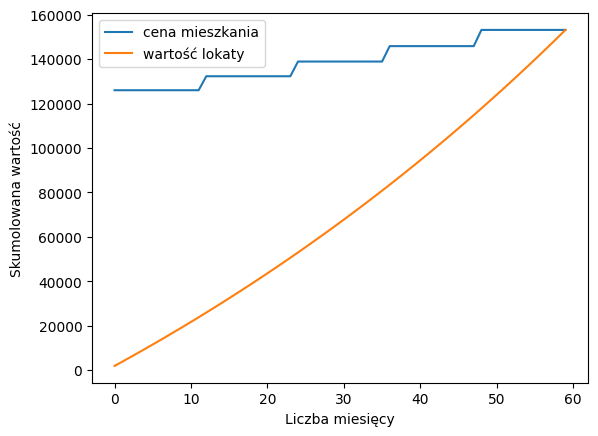

In [24]:
plt.plot(fp, label = 'cena mieszkania')
plt.plot(fv_save, label = 'wartość lokaty')
plt.legend()
plt.xlabel('Liczba miesięcy')
plt.ylabel('Skumolowana wartość')